<a href="https://colab.research.google.com/github/sujal-prakash15/Machine_learning/blob/master/vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Polynomial Regression/Position_Salaries.csv')

In [ ]:
print(df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [ ]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [ ]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y=y.reshape([len(y),1])

In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
sc1=StandardScaler()
y=sc1.fit_transform(y)
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
svr_reg=SVR(kernel='rbf')#radial basis function kernel(rbf)
svr_reg.fit(x,y)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [ ]:
pred=svr_reg.predict(sc.transform([[6.5]]))
pred_inv=sc1.inverse_transform(pred.reshape(-1,1))#inveresing the result to the original value
print(pred_inv)

[[170370.0204065]]


## Visualising the SVR results

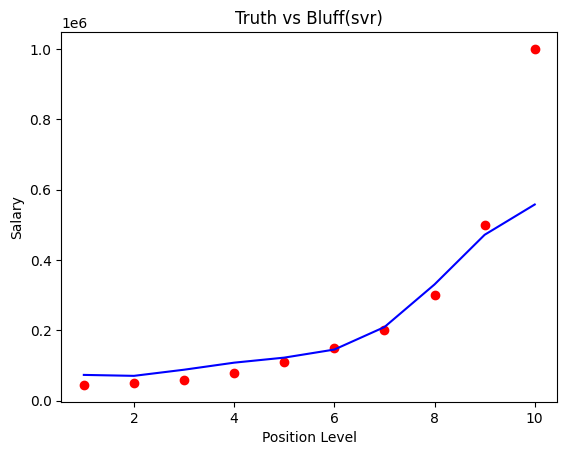

In [ ]:
plt.scatter(sc.inverse_transform(x),sc1.inverse_transform(y),color='red')
plt.plot(sc.inverse_transform(x),sc1.inverse_transform(svr_reg.predict(x).reshape(-1,1)),color='blue')
plt.title('Truth vs Bluff(svr)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

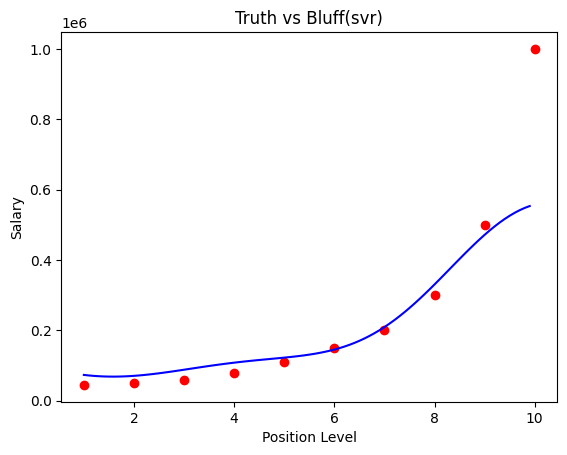

In [ ]:
X_real=sc.inverse_transform(x)
X_grid=np.arange(min(X_real),max(X_real),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(sc.inverse_transform(x),sc1.inverse_transform(y),color='red')
plt.plot(X_grid,sc1.inverse_transform(svr_reg.predict(sc.transform(X_grid)).reshape(-1,1)),color='blue')
plt.title('Truth vs Bluff(svr)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()